importing necessory libraries

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.preprocessing import OneHotEncoder 


reading the file 

In [49]:
df = pd.read_csv('C:\git\-Predictive-Maintenance-for-Industrial-Equipment\data\predictive_maintenance.csv')

In [50]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [51]:
df.shape

(10000, 10)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [54]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [55]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [77]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

there is no null values

In [78]:
df.duplicated().sum()

0

there is no duplicated values



The data is clean and ready for analysis.

In [56]:
df.drop('UDI',axis=1,inplace=True)

In [57]:
df.drop('Product ID',axis=1,inplace=True)
df.drop('Failure Type',axis=1,inplace=True)

In [58]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [59]:
df.Target.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [60]:
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_cols = ['Type']


### Discriptive Analysis


In [61]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0


 The descriptive statistics suggest that while temperature conditions during the manufacturing process remain relatively stable, factors such as rotational speed, torque, and tool wear exhibit more variability. 
 
 Understanding and monitoring these variables could be crucial for optimizing the manufacturing process, ensuring product quality, and minimizing equipment downtime. Further analysis, including correlation analysis and exploration of failure types, can provide additional insights into the relationships between these variables and potential areas for improvement in the manufacturing process.

### Data Visualization

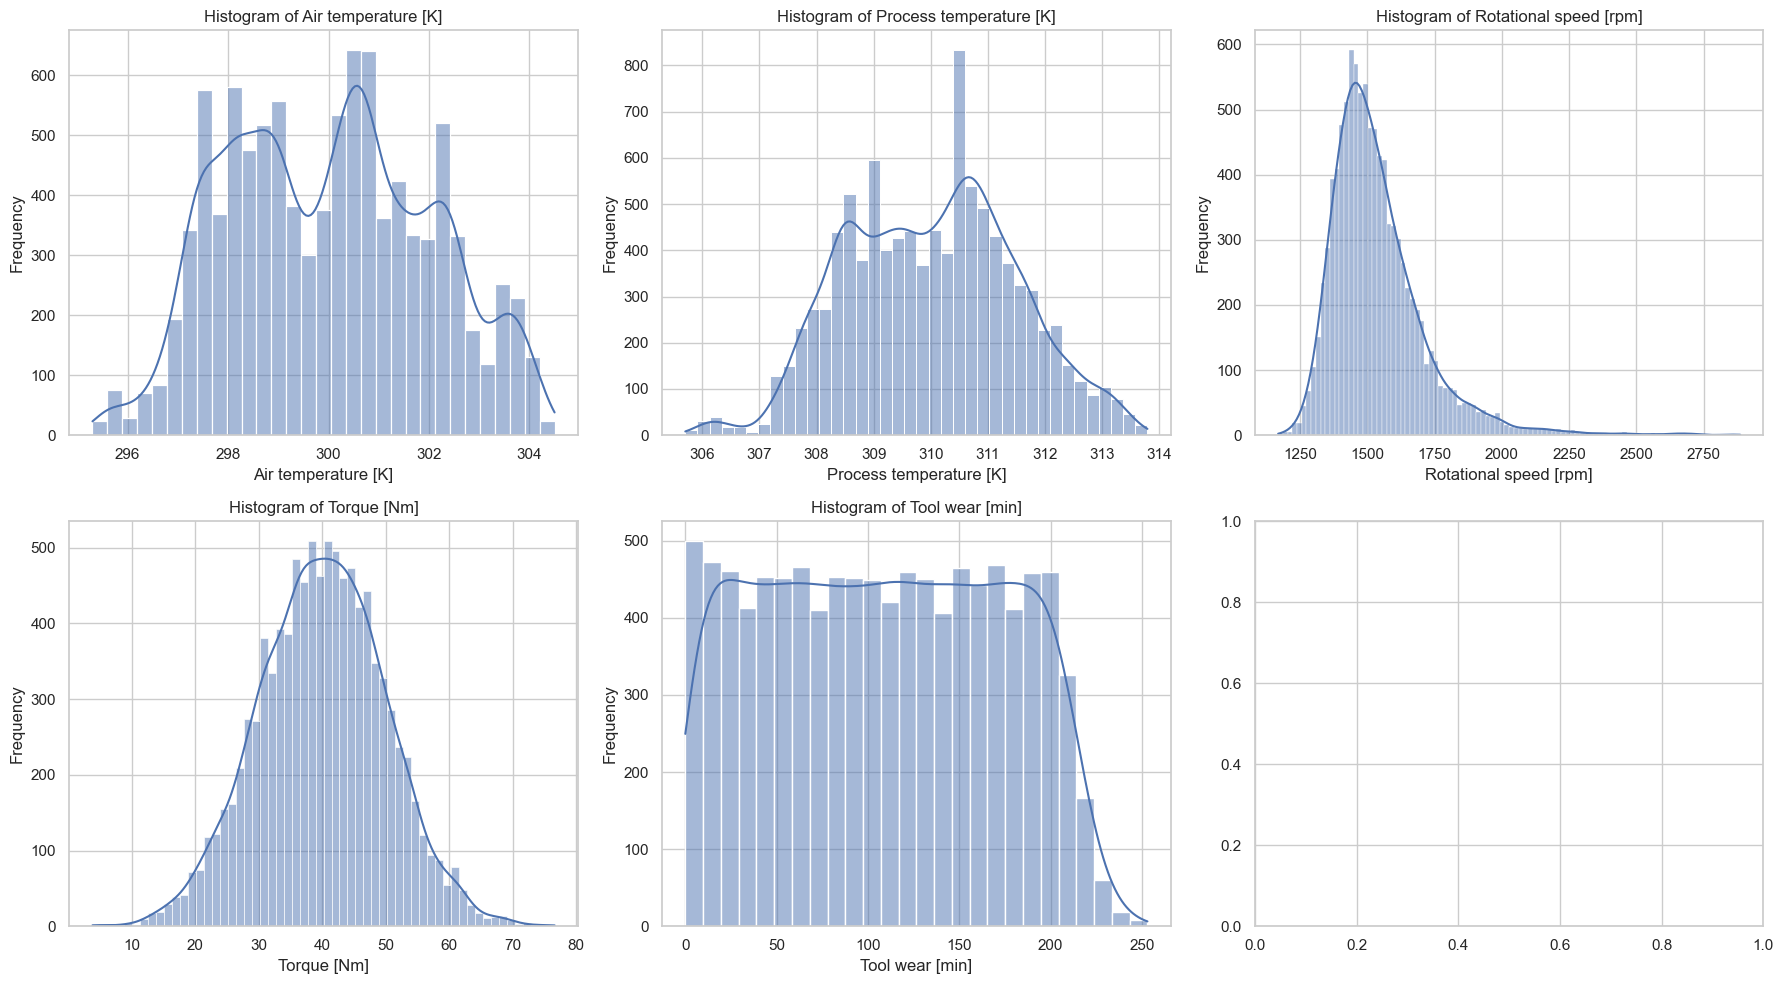

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


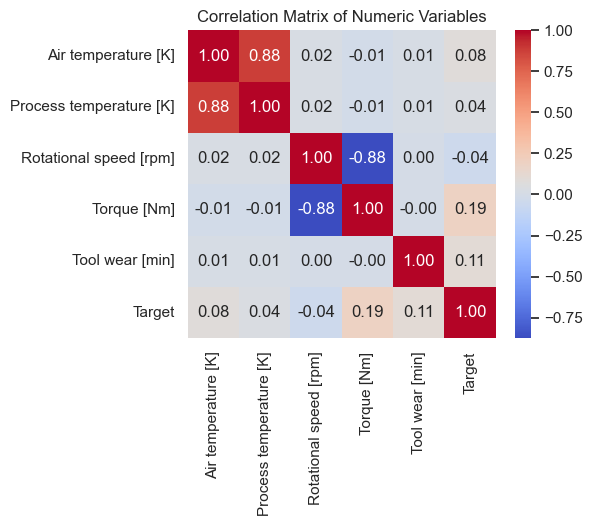

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


As we can see air temperature and process temperature are highly correlated with each other.

and also rotational speed and torque are highly correlated with each other.

target is highly correlated with torque.


<Figure size 400x400 with 0 Axes>

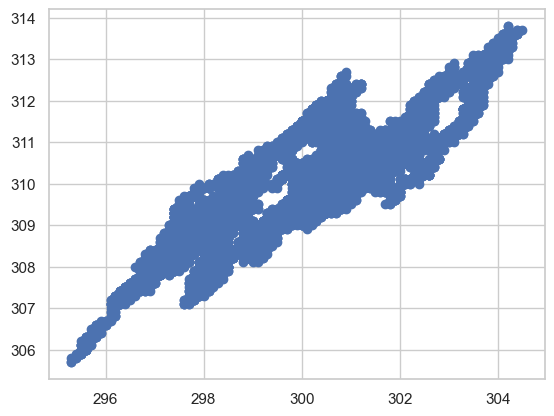

<Figure size 400x400 with 0 Axes>

In [66]:
plt.scatter(df['Air temperature [K]'], df['Process temperature [K]'])
plt.figure(figsize=(4, 4))

<Figure size 400x400 with 0 Axes>

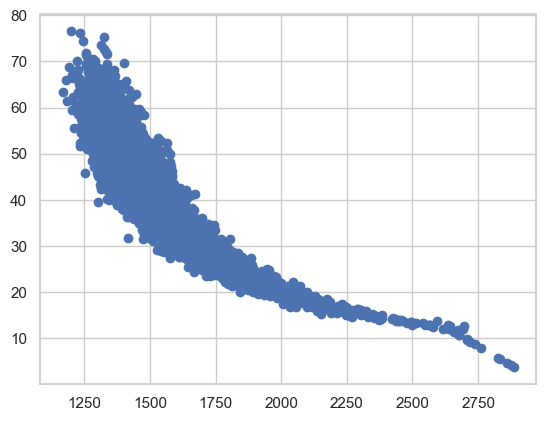

<Figure size 400x400 with 0 Axes>

In [67]:
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'])
plt.figure(figsize=(4, 4))

## Categorical Analysis

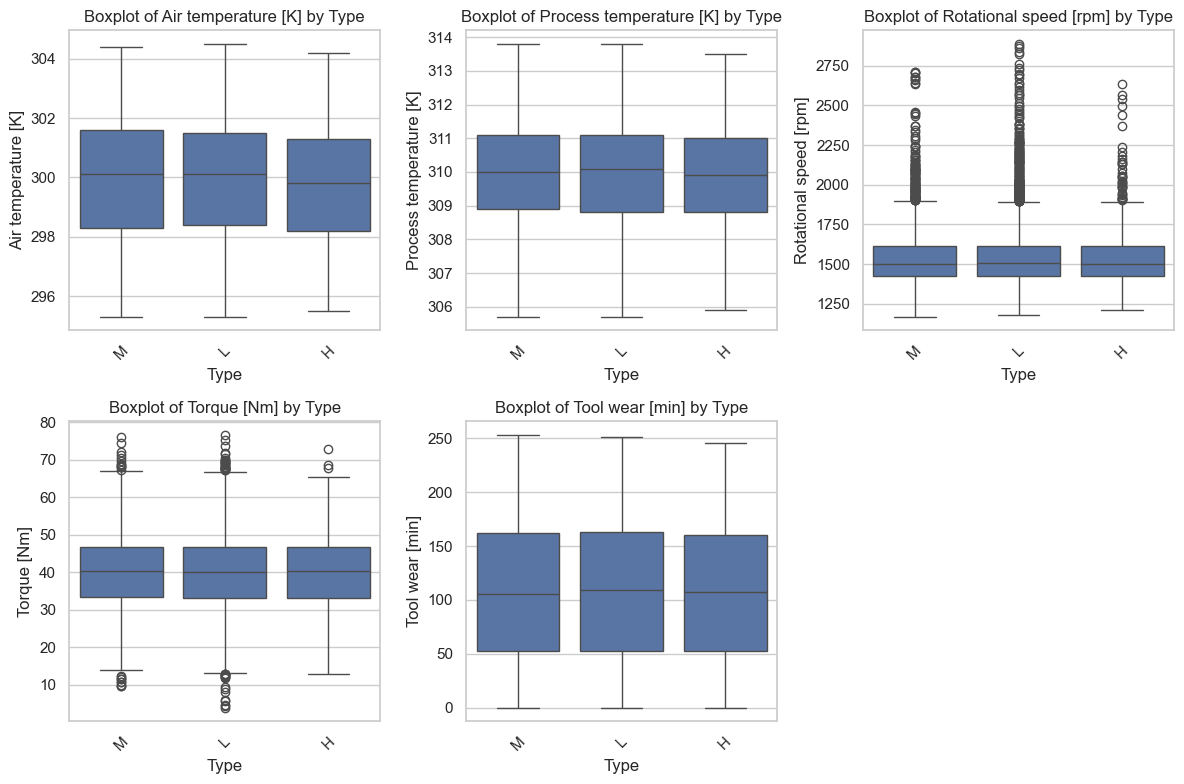

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f'Boxplot of {col} by Type')
    plt.xlabel('Type')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


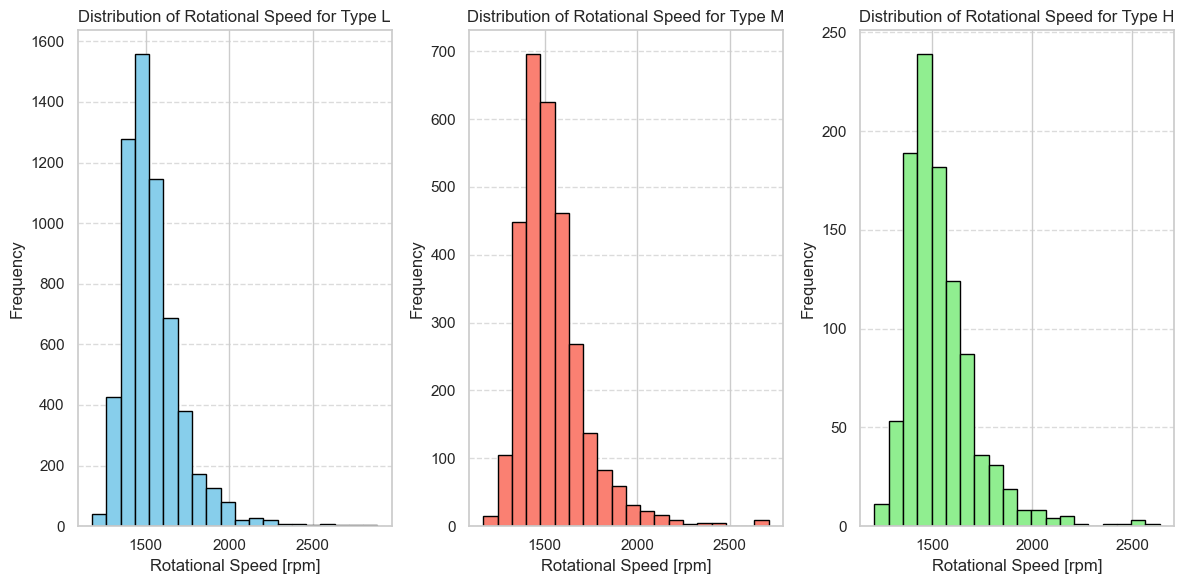

In [73]:
import matplotlib.pyplot as plt

# Filter data for each type: L, M, H
type_L_data = df[df['Type'] == 'L']
type_M_data = df[df['Type'] == 'M']
type_H_data = df[df['Type'] == 'H']

# Plot the distribution of 'Rotational speed [rpm]' for each type
plt.figure(figsize=(12, 6))

# Plot for Type L
plt.subplot(1, 3, 1)
plt.hist(type_L_data['Rotational speed [rpm]'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Rotational Speed for Type L')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Type M
plt.subplot(1, 3, 2)
plt.hist(type_M_data['Rotational speed [rpm]'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Rotational Speed for Type M')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Type H
plt.subplot(1, 3, 3)
plt.hist(type_H_data['Rotational speed [rpm]'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Rotational Speed for Type H')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


We can see the data is more skewed towards right side.
so we can call this data as right skewed data.

we can apply log transformation to right skewed data to make it more normal.